#  Análise Exploratória de Dados

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## 1. Descrição dos Dados

In [2]:
db = pd.read_csv('/home/cristina/Public/projetos/atlantico-bootcamp-cd/data/raw/forbes-richest-athletes.csv')

In [3]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


--------------------------------------------------------------------------
Com o método info(), verifica-se que o conjunto de dados possui 8 colunas, **4 com variáveis *discretas* e 4 com variáveis *qualitativas***, além de 301 instâncias.

Das 4 colunas quantitativas, somente uma - a coluna earnings ($ million) - é de variável do tipo decimal.

Nota-se que a 'Previous Year Rank' é a única coluna com 24 dados faltantes. 

### Descrição das variáveis

1. S.NO: id das instâncias da tabela. Tipo da variável: nominal
2. Name: nome dos atletas. Tipo de variável: categórica
3. Nationality: nacionalidade dos atletas. Tipo de variável: categórica
4. Current Rank: ranking atual do atleta. Tipo de variável: ordinal
5. Previous Year Rank: ranking anterior do atlea. Tipo de variável: categórica
6. Sport: esporte em que atua ou atuava o atleta. Tipo de variável: categórica
7. Year: ano em que o atleta foi o mais bem pago. Tipo de variável: discreta
8. earnings ($ million): valor do salário do atleta mais bem pago. Tipo de variável: continua

In [4]:
db.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [5]:
db['sport_new'] = db['Sport'].apply(lambda x:x.lower())

In [6]:
db.tail(5)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million),sport_new
296,297,Stephen Curry,USA,6,9,Basketball,2020,74.4,basketball
297,298,Kevin Durant,USA,7,10,Basketball,2020,63.9,basketball
298,299,Tiger Woods,USA,8,11,Golf,2020,62.3,golf
299,300,Kirk Cousins,USA,9,>100,American Football,2020,60.5,american football
300,301,Carson Wentz,USA,10,>100,American Football,2020,59.1,american football


In [7]:
earnings = db['earnings ($ million)']

> obs: Para facilitar a escrita do código, a coluna **earnings ($ million)** foi atribuida à uma variável.

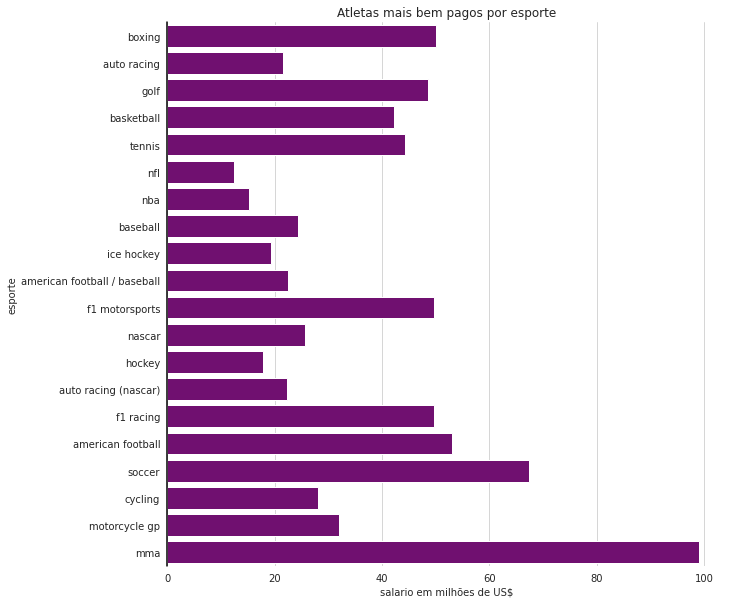

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,10))
axis=sns.barplot(
            y=db['sport_new'],
            x=earnings,
            color='purple',
            ci=None     
                )

axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False)
plt.title('Atletas mais bem pagos por esporte')
plt.xlabel('salario em milhões de US$')
plt.ylabel('esporte')
plt.show()

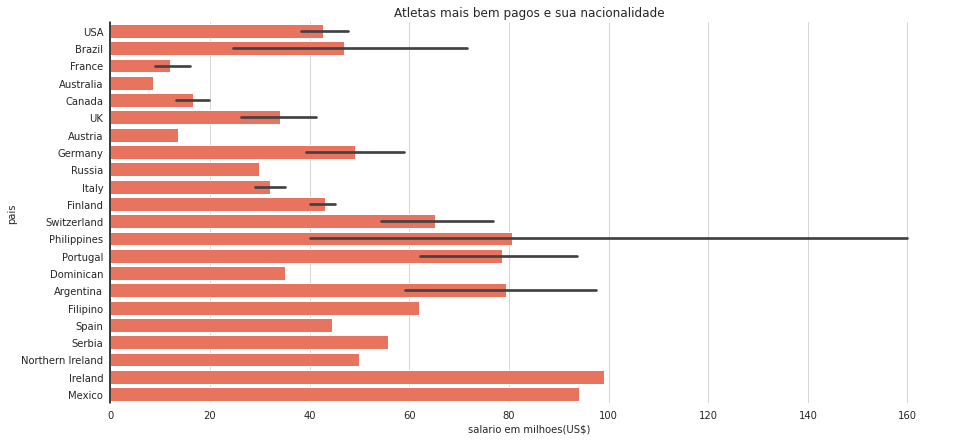

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,7))
axis=sns.barplot(
            y=db['Nationality'],
            x=earnings,    
            color='tomato'
                )

axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False)
plt.title('Atletas mais bem pagos e sua nacionalidade')
plt.xlabel('salario em milhoes(US$)')
plt.ylabel('pais')
plt.show()

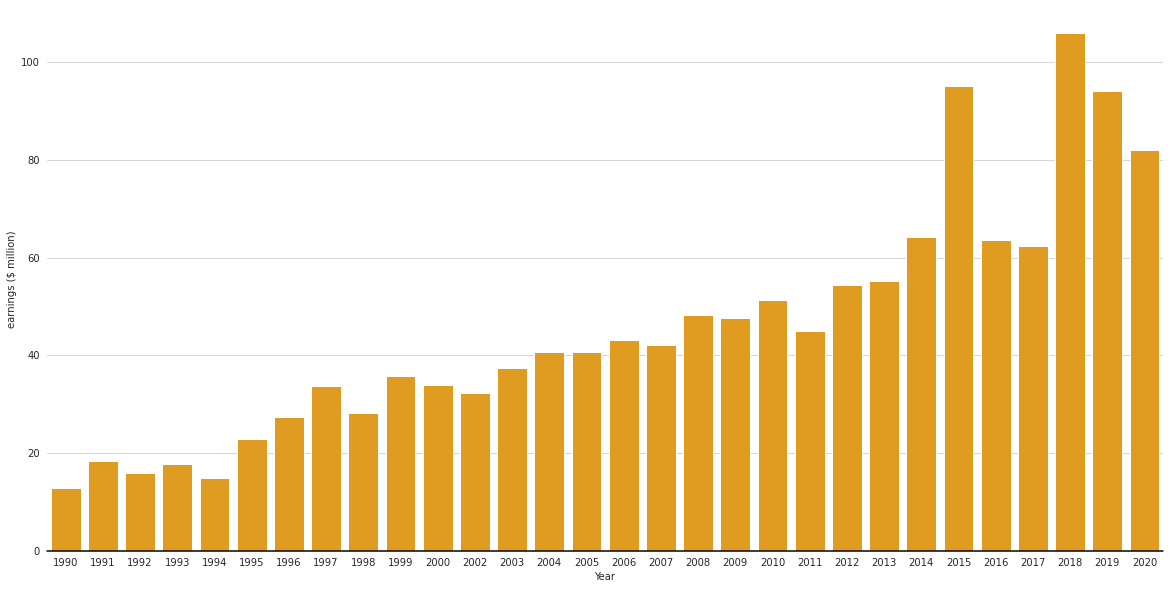

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
axis=sns.barplot(data=db,
            x='Year',
            y=earnings,
            color='orange',
            ci=None     
                )

axis.set(frame_on=False)
axis.axhline(0, color='k', clip_on=False)
plt.show()

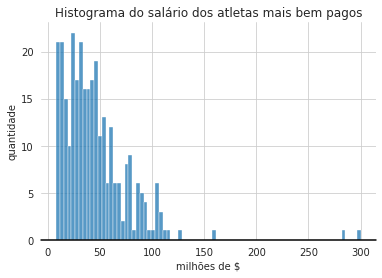

In [11]:
sns.set_style('whitegrid')
x = sns.histplot(data=db, x=earnings, bins=80)
x.set(frame_on=False)
x.axhline(0, color='k', clip_on=False)
plt.title('Histograma do salário dos atletas mais bem pagos')
plt.xlabel('milhões de $')
plt.ylabel('quantidade')
plt.show()

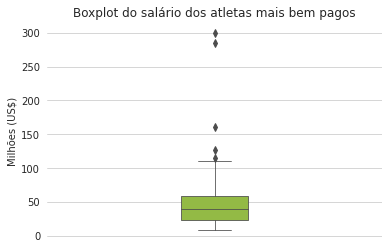

In [12]:
sns.boxplot(y=earnings,
            color='yellowgreen',
            width=0.2,
            linewidth=0.8
           ).set(frame_on=False)
plt.title('Boxplot do salário dos atletas mais bem pagos')
plt.ylabel('Milhões (US$)')
plt.show()

## 2. Perguntas de Partida e Hipótese

 - Perguntas de partida:

1. Por que no ano de 2015, a média salarial quase dobrou?
2. E por que nos anos 2016 e 2017, voltou ao patamar de antes de 2015?
3. Por que a média salarial caiu nos 3 últimos anos?
4. Como resolver os outliers?
5. No gráfico de barras salário x paises, o intervalo de confiança é muito grande para Filipinas. Como isto influencia a análise de dados? 

- Hipótese

1. A entrada de novos esportes e a inclusão de atletas das mais variadas nacionalidades podem ter modificado o quadro dos atletas mais bem pagos.

## 3. Insights

Esportes dos atletas mais bem pagos: 

- basquete;
- baseball;
- automobilistico;
- boxe;
- tenis;
- golfe;
- MMA;
- futebol;
- futebol americano;

com destaque para o **MMA**, cujo salário é o maior.

Não houve muita variação da média salarial, com exceção de 2015, em que quase dobrou, e nos últimos 3 anos (2018, 2019, 2020).

A Irlanda é o país com maior meia salarial para os atletas mais bem pagos.

O histograma mostra que o gráfico está deslocado para a esquerda, significando que cerca 90% dos atletas mais bem pagos, tem salário entre 5 e 100 milhões de dólares, aproximadamente.

A média salarial é de aproximadamente US$45 milhões.
